# Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Check out the Data

In [7]:
Ent_data = pd.read_csv('ent_data.csv')

In [3]:
Ent_data.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1


In [8]:
Ent_data.isnull().sum()

EducationSector            0
IndividualProject          0
Age                        0
Gender                     0
City                       0
Influenced                 0
Perseverance               0
DesireToTakeInitiative     0
Competitiveness            0
SelfReliance               0
StrongNeedToAchieve        0
SelfConfidence             0
GoodPhysicalHealth         0
MentalDisorder             0
KeyTraits                  0
ReasonsForLack            91
y                          0
dtype: int64

In [9]:
Ent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EducationSector         219 non-null    object
 1   IndividualProject       219 non-null    object
 2   Age                     219 non-null    int64 
 3   Gender                  219 non-null    object
 4   City                    219 non-null    object
 5   Influenced              219 non-null    object
 6   Perseverance            219 non-null    int64 
 7   DesireToTakeInitiative  219 non-null    int64 
 8   Competitiveness         219 non-null    int64 
 9   SelfReliance            219 non-null    int64 
 10  StrongNeedToAchieve     219 non-null    int64 
 11  SelfConfidence          219 non-null    int64 
 12  GoodPhysicalHealth      219 non-null    int64 
 13  MentalDisorder          219 non-null    object
 14  KeyTraits               219 non-null    object
 15  Reason

In [10]:
Ent_data.describe()

,Age,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,y
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,19.753425,3.351598,3.621005,3.589041,3.721461,3.908676,3.575342,3.561644,0.415525
std,1.289842,0.995234,1.152467,1.110859,1.053629,1.023068,1.120098,1.100287,0.493941
min,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,19.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000
50%,20.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,20.000000,4.000000,5.000000,4.500000,5.000000,5.000000,4.000000,4.000000,1.000000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


# Data Visualization
#Let's create some simple plots to check out the data!

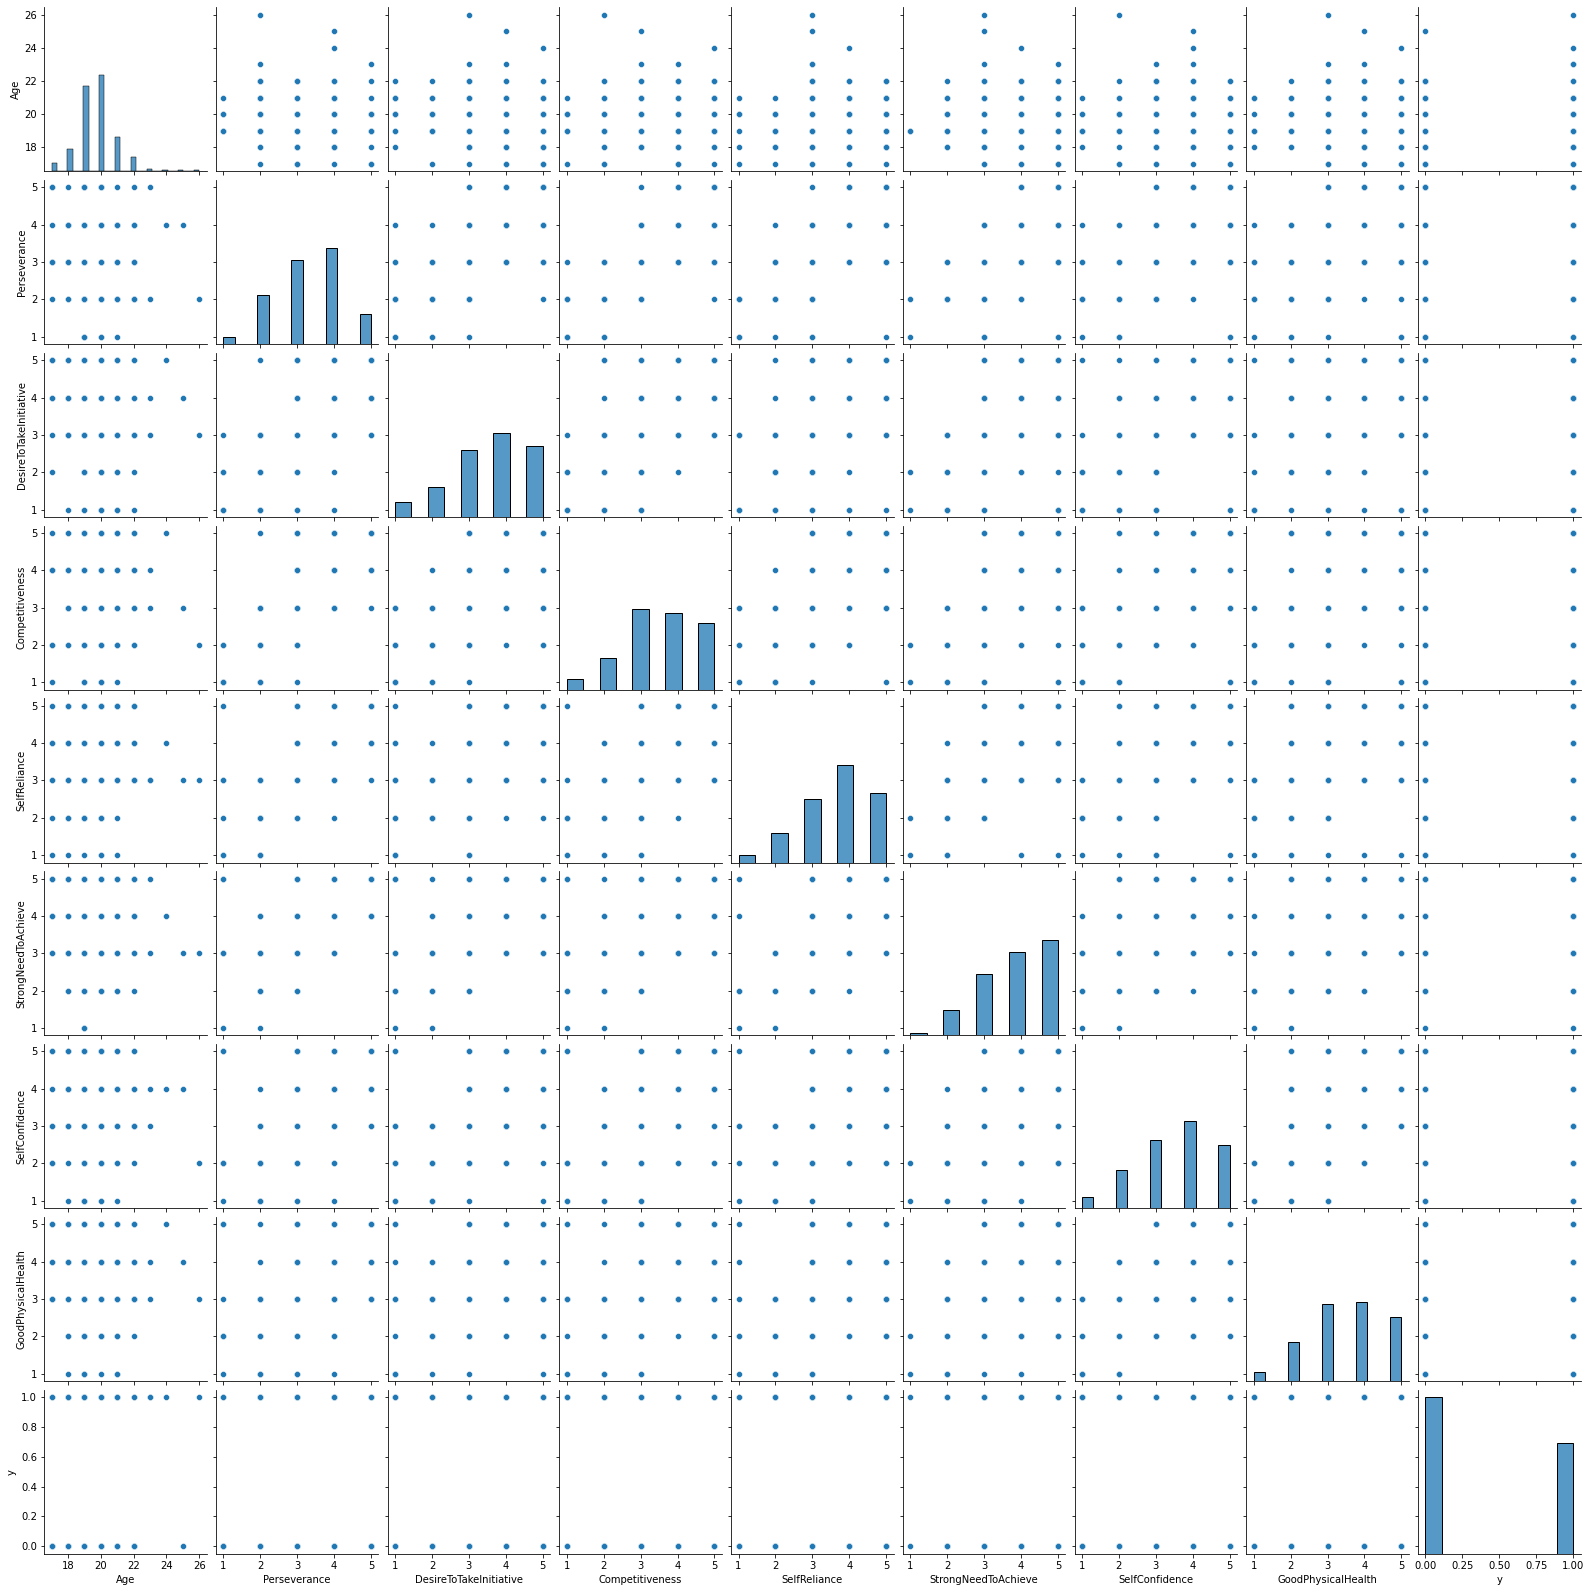

In [13]:
sns.pairplot(Ent_data)

<AxesSubplot:>

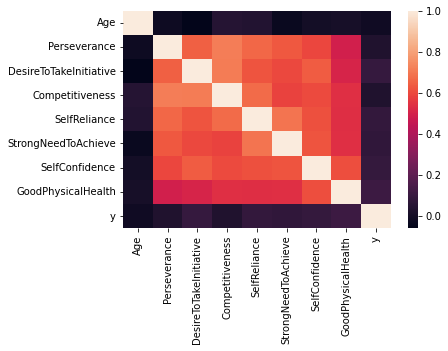

In [31]:
sns.heatmap(Ent_data.corr())

#Training a Linear Regression Model

We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the y column.

X and y array

In [32]:
X = Ent_data[[ 'Age','Perseverance','DesireToTakeInitiative','Competitiveness','SelfReliance', 'StrongNeedToAchieve', 
              'GoodPhysicalHealth']]
y = Ent_data['y']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [ ]:
##Training The Model
##Import Linear Regression from sklearn.linear_model

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lm = LinearRegression()


In [37]:
lm.fit(X_train,y_train)

LinearRegression()

In [38]:
# print the intercept
print(lm.intercept_)

0.8084670172478828


In [40]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Age,-0.031170
Perseverance,-0.069135
DesireToTakeInitiative,0.018631
Competitiveness,0.030050
SelfReliance,0.064522
StrongNeedToAchieve,-0.031451
GoodPhysicalHealth,0.028637


In [42]:
predictions = lm.predict(X_test)

In [ ]:
plt.scatter(y_test,predictions)

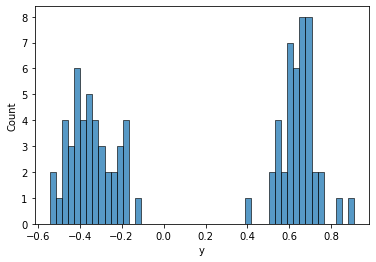

In [49]:
sns.histplot((y_test-predictions),bins=50);

In [ ]:
#Regression Evaluation Metrics

#Comparing these metrics:

#MAE is the easiest to understand, because it's the average error.
#MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
#RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
#All of these are loss functions, because we want to minimize them.

In [46]:
from sklearn import metrics

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.4960898414615022
MSE: 0.2772726213962067
RMSE: 0.5265668251952517


Text(0.5, 1.0, 'Education Sector and Entrepreneurial Competency')

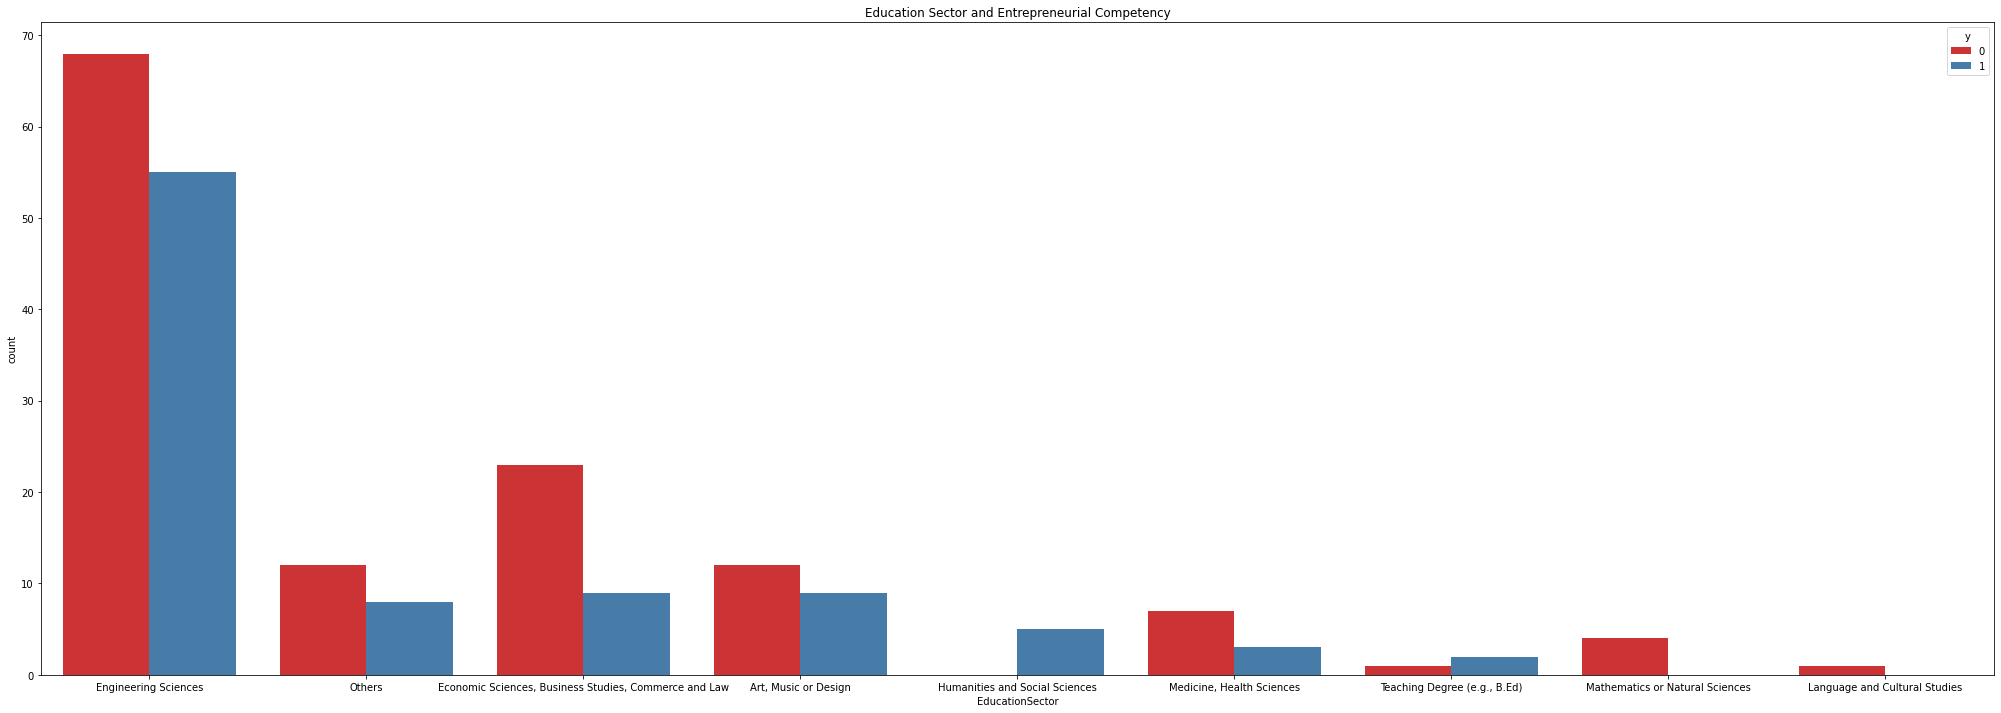

In [11]:
plt.figure(figsize=(35,12))

education = sns.countplot(x= 'EducationSector', hue='y', data=Ent_data, palette="Set1")
education.set_title(label = 'Education Sector and Entrepreneurial Competency')

In [14]:
Ent_data.columns


Index(['EducationSector', 'IndividualProject', 'Age', 'Gender', 'City',
       'Influenced', 'Perseverance', 'DesireToTakeInitiative',
       'Competitiveness', 'SelfReliance', 'StrongNeedToAchieve',
       'SelfConfidence', 'GoodPhysicalHealth', 'MentalDisorder', 'KeyTraits',
       'ReasonsForLack', 'y'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='count'>

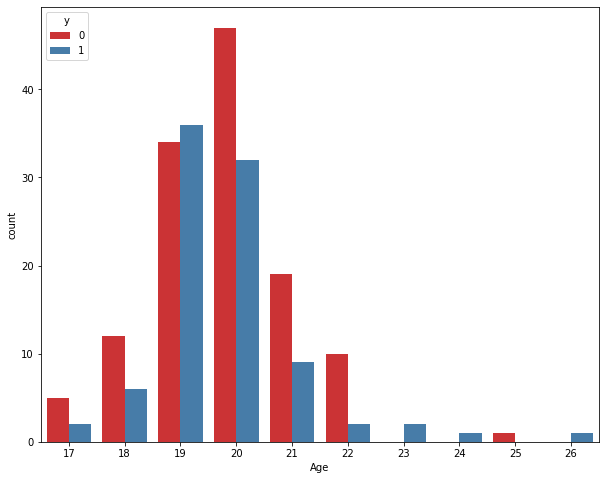

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(x =Ent_data['Age'], hue = 'y', data=Ent_data, palette="Set1")

<AxesSubplot:xlabel='Competitiveness', ylabel='count'>

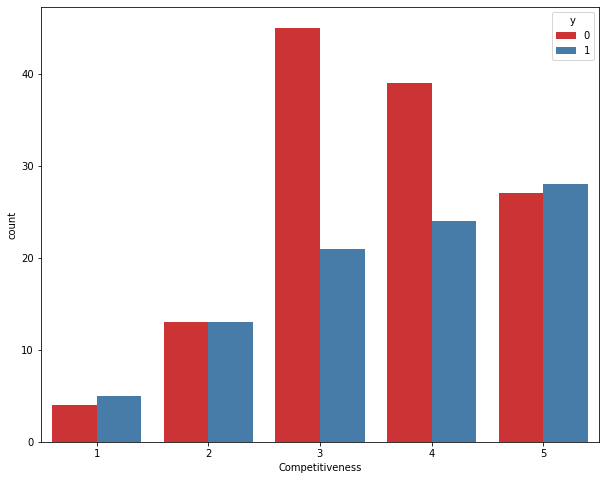

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(x=Ent_data['Competitiveness'], hue = 'y', data=Ent_data, palette="Set1")


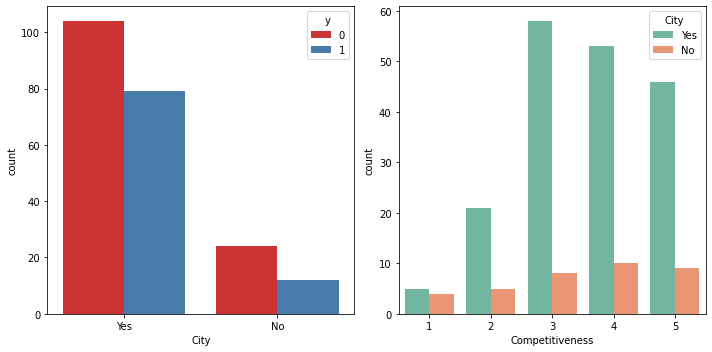

In [21]:
fig, (a1,a2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.countplot(x=Ent_data['City'], hue = 'y', data=Ent_data, palette="Set1", ax=a1)
sns.countplot(x=Ent_data['Competitiveness'], hue = 'City', data=Ent_data, palette="Set2",ax=a2)
fig.tight_layout()